In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('space_missions.csv',encoding='latin-1')
df.head(2)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success


In [3]:
df.tail(2)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-07-29,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,29.75,Success


In [4]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [5]:
for col in df.columns:
    print(col)

Company
Location
Date
Time
Rocket
Mission
RocketStatus
Price
MissionStatus


In [6]:
df.shape

(4630, 9)

In [7]:
print("No of Rows:",df.shape[0])

No of Rows: 4630


In [8]:
print("No of Columns:",df.shape[1])

No of Columns: 9


In [9]:
print('Total Elements:',df.size)

Total Elements: 41670


In [10]:
#Data Types
df.dtypes

,0
Company,object
Location,object
Date,object
Time,object
Rocket,object
Mission,object
RocketStatus,object
Price,object
MissionStatus,object


In [11]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [ ]:
df.dtypes

,0
Company,object
Location,object
Date,datetime64[ns]
Time,object
Rocket,object
Mission,object
RocketStatus,object
Price,object
MissionStatus,object


In [12]:
df['Time'] = df['Time'].astype('datetime64[ns]')

In [ ]:
df.dtypes

,0
Company,object
Location,object
Date,datetime64[ns]
Time,datetime64[ns]
Rocket,object
Mission,object
RocketStatus,object
Price,object
MissionStatus,object


In [13]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2495500731.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df.dtypes

,0
Company,object
Location,object
Date,datetime64[ns]
Time,datetime64[ns]
Rocket,object
Mission,object
RocketStatus,object
Price,float64
MissionStatus,object


In [14]:
# Null Values
df.isnull()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,False,False,False,False,False
4626,False,False,False,False,False,False,False,True,False
4627,False,False,False,False,False,False,False,False,False
4628,False,False,False,False,False,False,False,True,False


In [15]:
df.isnull().sum()

,0
Company,0
Location,0
Date,0
Time,127
Rocket,0
Mission,0
RocketStatus,0
Price,3365
MissionStatus,0


In [16]:
df.isnull().sum().sum()

np.int64(3492)

In [17]:
# Golden Rule for Price Column
print('Percentage of Nulls in Price Column:',(df['Price'].isnull().sum())/len(df)*100)

Percentage of Nulls in Price Column: 72.67818574514038


In [18]:
# Golden Rule for Time Column
print('Percentage of Nulls in Time Column:',(df['Time'].isnull().sum())/len(df)*100)

Percentage of Nulls in Time Column: 2.7429805615550755


In [19]:
# Imputation for Price Column - Finding Skewness
print('Skewness for Price Column:',df['Price'].skew())


Skewness for Price Column: 11.681483249606337


In [20]:
df['Price'] = df['Price'].fillna(df['Price'].median())

In [ ]:
df.isnull().sum()

,0
Company,0
Location,0
Date,0
Time,127
Rocket,0
Mission,0
RocketStatus,0
Price,0
MissionStatus,0


Skewness: 21.848369297250485


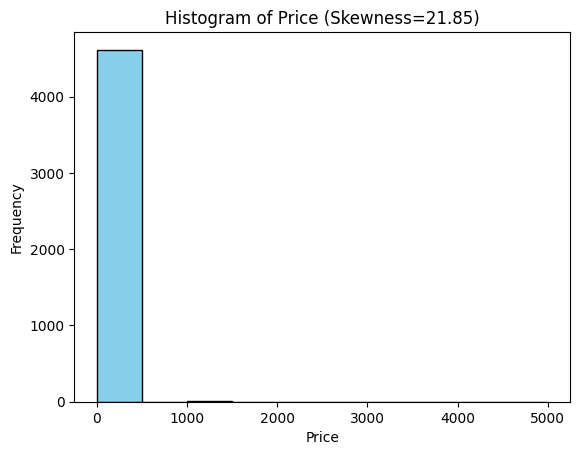

In [21]:
# Calculate skewness
skew_value = df['Price'].skew()
print("Skewness:", skew_value)

# Plot histogram
plt.hist(df['Price'], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Price (Skewness={skew_value:.2f})')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [22]:
# Duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 1


In [23]:
start = len(df)
df.drop_duplicates(inplace=True)
end = len(df)
print("Number of duplicate rows removed:", start - end)

Number of duplicate rows removed: 1


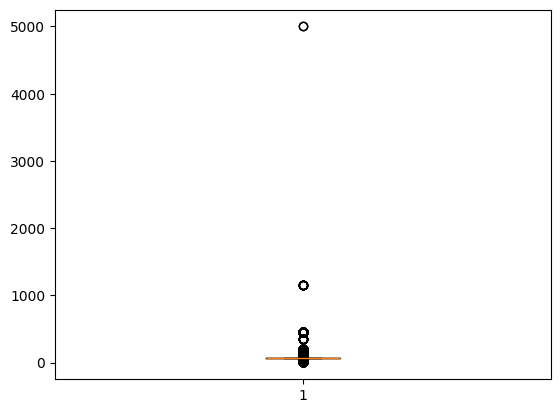

In [24]:
# Outliers
plt.boxplot(df['Price'])
plt.show()

In [25]:
# Remove Outliers
def remove_outliers_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Update only the Price column in the original DataFrame
df = remove_outliers_column(df, 'Price')


In [26]:
df = remove_outliers_column(df, 'Price')

In [27]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [28]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,2025-10-01 19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,63.23,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,2025-10-01 02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,63.23,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,2025-10-01 16:44:00,Vanguard,Vanguard TV3,Retired,63.23,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,2025-10-01 03:48:00,Juno I,Explorer 1,Retired,63.23,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,2025-10-01 07:33:00,Vanguard,Vanguard TV3BU,Retired,63.23,Failure


Text(0.5, 1.0, 'Rocket Status Distribution')

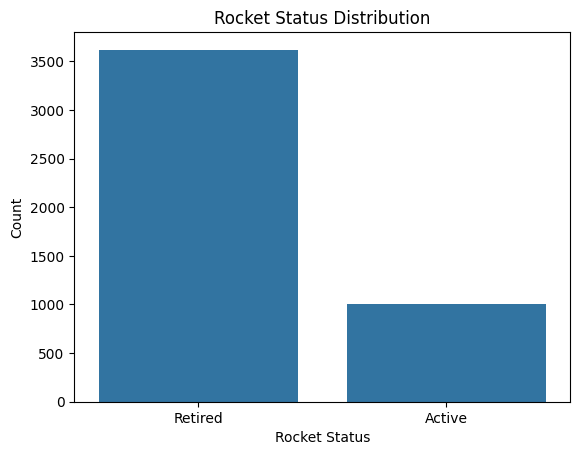

In [30]:
# Rocket Status
sns.countplot(x='RocketStatus',data=df)
plt.xlabel('Rocket Status')
plt.ylabel('Count')
plt.title('Rocket Status Distribution')

In [31]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

Text(0.5, 1.0, 'MissionStatus Distribution')

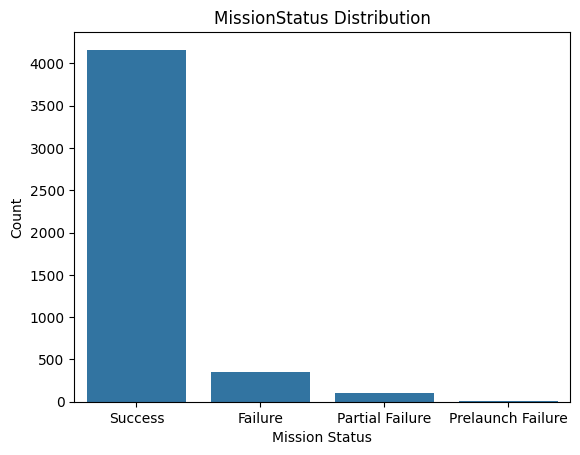

In [32]:
# Mission Status
sns.countplot(x='MissionStatus',data=df)
plt.xlabel('Mission Status')
plt.ylabel('Count')
plt.title('MissionStatus Distribution')

In [33]:
df['MissionStatus'].value_counts().sort_values(ascending=False)

,count
MissionStatus,
Success,4161
Failure,357
Partial Failure,107
Prelaunch Failure,4


In [34]:
success_companies = df[df['MissionStatus'] == 'Success']['Company']

# Get unique company names (if you want only unique ones)
unique_success_companies = success_companies.unique()

# Print the result
print("Companies with successful missions:")
print(unique_success_companies)

Companies with successful missions:
['RVSN USSR' 'AMBA' 'US Navy' 'US Air Force' 'General Dynamics' 'NASA'
 'Martin Marietta' "Armée de l'Air" 'ASI' 'OKB-586' 'CECLES' 'Yuzhmash'
 'UT' 'CNES' 'CASC' 'Roscosmos' 'ISAS' 'RAE' 'MHI' 'ESA' 'ISRO'
 'Arianespace' 'IAI' 'Boeing' 'Douglas' 'Northrop' 'Lockheed' 'VKS RF'
 'MITT' 'ILS' 'SRC' 'Sea Launch' 'Kosmotras' 'Eurockot' 'Starsem' 'ULA'
 'SpaceX' 'ISA' 'Land Launch' 'KCST' 'KARI' 'JAXA' 'CASIC' 'Khrunichev'
 'Blue Origin' 'ExPace' 'Rocket Lab' 'i-Space' 'IRGC' 'Galactic Energy'
 'Virgin Orbit' 'GK LS' 'Virgin Galactic' 'Astra' 'CAS Space']


Text(0, 0.5, 'Count of Successful Missions')

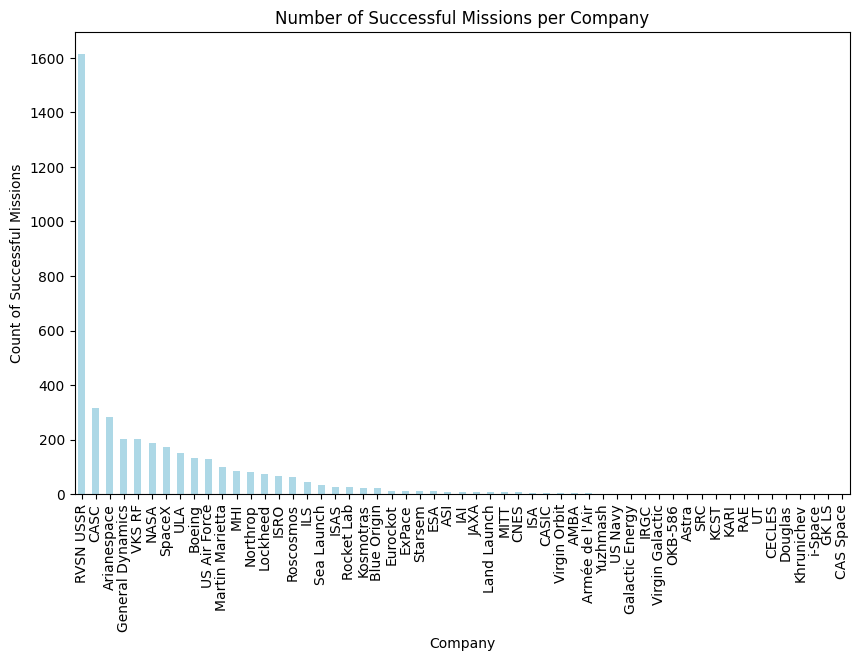

In [35]:
success_companies = df[df['MissionStatus'] == 'Success']['Company']


success_company_counts = success_companies.value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
success_company_counts.plot(kind='bar', color='lightblue')


plt.title('Number of Successful Missions per Company')
plt.xlabel('Company')
plt.ylabel('Count of Successful Missions')

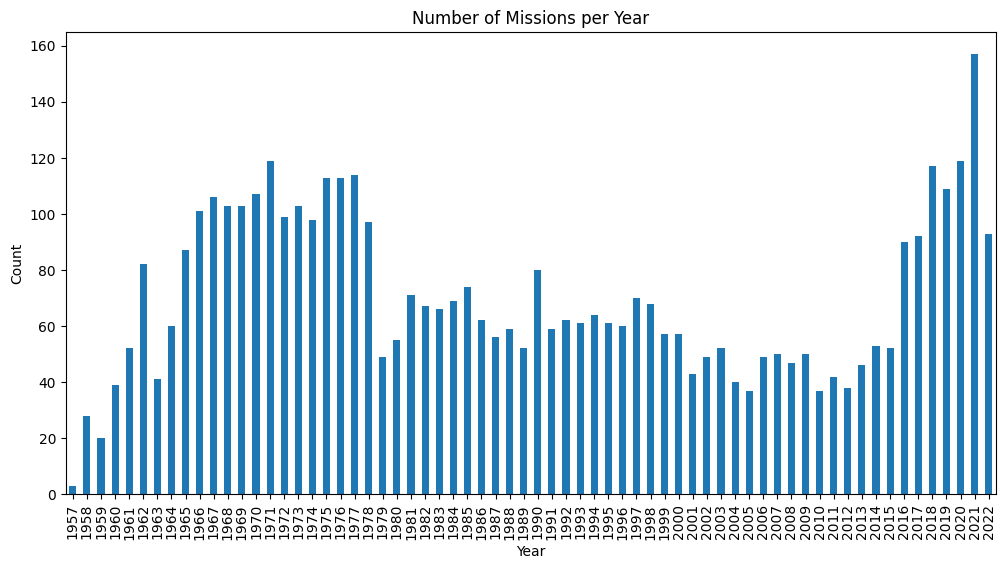

In [36]:
# Missions over time
plt.figure(figsize=(12,6))
df['Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Number of Missions per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

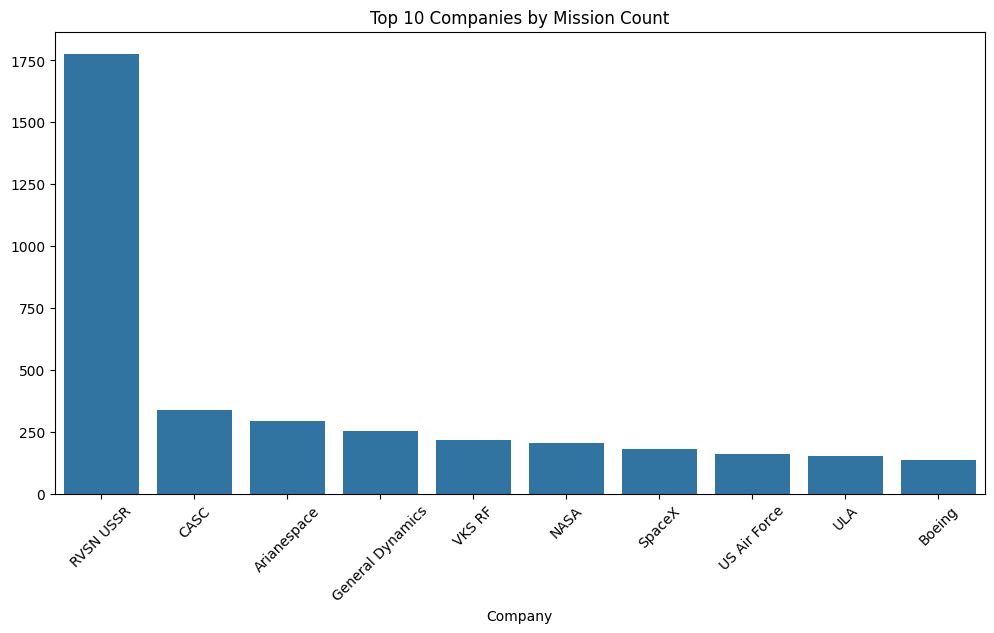

In [37]:
# Company vs Missions
plt.figure(figsize=(12,6))
top_companies = df['Company'].value_counts().head(10)
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xticks(rotation=45)
plt.title("Top 10 Companies by Mission Count")
plt.show()

In [38]:
# Example filters
# Missions by a specific company
spacex_missions1 = df[df['Company'] == 'SpaceX']['Company'].shape[0]
spacex_missions2 = df[df['Company'] == 'SpaceX']['Rocket'].shape[0]
print(spacex_missions2)

182


In [39]:
# Missions after 2010
recent_missions = df[df['Date'].dt.year > 2010].shape[0]
print(recent_missions)

1008


In [42]:
# Expensive missions (Price > 10M)
expensive_missions = df[df['Price'] > 10]
print(expensive_missions)

        Company                                         Location       Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA 1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1958-02-05   
...         ...                                              ...        ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA 2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China 2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA 2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China 2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China 2022-07-29   

                    Time            Rocket         